In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the Excel file
file_path = r"C:\Users\Joseph\Desktop\School\Masters Data Science\Data Presentation\nationaldatabaseofchildcareprices.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows to inspect the data
print(data.head())

  State_Name State_Abbreviation     County_Name  County_FIPS_Code  StudyYear  \
0    Alabama                 AL  Autauga County              1001       2008   
1    Alabama                 AL  Autauga County              1001       2009   
2    Alabama                 AL  Autauga County              1001       2010   
3    Alabama                 AL  Autauga County              1001       2011   
4    Alabama                 AL  Autauga County              1001       2012   

   UNR_16  FUNR_16  MUNR_16  UNR_20to64  FUNR_20to64  ...  MFCCToddler  \
0    5.42     4.41     6.32         4.6          3.5  ...        83.45   
1    5.93     5.72     6.11         4.8          4.6  ...        87.39   
2    6.21     5.57     6.78         5.1          4.6  ...        91.33   
3    7.55     8.13     7.03         6.2          6.3  ...        95.28   
4    8.60     8.88     8.29         6.7          6.4  ...        99.22   

   MFCCToddler_flag  MFCCPreschool  MFCCPreschool_flag  _75FCCInfant  \
0 

# Clean Data (If any)

In [8]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in numeric columns with the mean of each column
data_filled = data.copy()
data_filled[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Check for remaining missing values
print("Remaining missing values:\n", data_filled.isnull().sum())

# Ensure the 'StudyYear' column is in the correct format if it is a year
data_filled['StudyYear'] = pd.to_datetime(data_filled['StudyYear'], format='%Y', errors='coerce')

# Preview the cleaned data
print(data_filled.head())

Remaining missing values:
 State_Name              0
State_Abbreviation      0
County_Name             0
County_FIPS_Code        0
StudyYear               0
                       ..
_75FCCInfant_flag       0
_75FCCToddler           0
_75FCCToddler_flag      0
_75FCCPreschool         0
_75FCCPreschool_flag    0
Length: 227, dtype: int64
  State_Name State_Abbreviation     County_Name  County_FIPS_Code  StudyYear  \
0    Alabama                 AL  Autauga County              1001 2008-01-01   
1    Alabama                 AL  Autauga County              1001 2009-01-01   
2    Alabama                 AL  Autauga County              1001 2010-01-01   
3    Alabama                 AL  Autauga County              1001 2011-01-01   
4    Alabama                 AL  Autauga County              1001 2012-01-01   

   UNR_16  FUNR_16  MUNR_16  UNR_20to64  FUNR_20to64  ...  MFCCToddler  \
0    5.42     4.41     6.32         4.6          3.5  ...        83.45   
1    5.93     5.72     6.11     

In [20]:
# Check for non-numeric values in each numeric column
for col in numeric_columns:
    non_numeric_count = data_filled[col].isna().sum()
    if non_numeric_count > 0:
        print(f"Column '{col}' has {non_numeric_count} NaN values.")
        
    # Check for any values that are not numeric
    non_numeric_values = data_filled[col][~data_filled[col].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric_values.empty:
        print(f"Column '{col}' has non-numeric values: {non_numeric_values.unique()}")

In [21]:
# Check for NaN values in numeric columns
nan_summary = data_filled[numeric_columns].isna().sum()
print("NaN values in numeric columns:\n", nan_summary[nan_summary > 0])

# Display data types for numeric columns
print("\nData types of numeric columns:\n", data_filled[numeric_columns].dtypes)

NaN values in numeric columns:
 Series([], dtype: int64)

Data types of numeric columns:
 County_FIPS_Code          int64
UNR_16                  float64
FUNR_16                 float64
MUNR_16                 float64
UNR_20to64              float64
                         ...   
_75FCCInfant_flag       float64
_75FCCToddler           float64
_75FCCToddler_flag      float64
_75FCCPreschool         float64
_75FCCPreschool_flag    float64
Length: 223, dtype: object


In [22]:
# Attempt to group data by state and calculate average costs
average_prices_by_state = data_filled.groupby('State_Name')[['UNR_16', 'FUNR_16', 'MUNR_16']].mean()

# Display the averages
print("Average Prices by State:\n", average_prices_by_state)

Average Prices by State:
                          UNR_16    FUNR_16    MUNR_16
State_Name                                           
Alabama               10.353731  10.602809  10.155631
Alaska                10.042579   7.962956  11.786132
Arizona               10.445030  10.373333  10.628182
Arkansas               8.519818   8.005685   8.984570
California            10.048605   9.372273  10.648542
Colorado               6.760795   6.458338   7.005767
Connecticut            7.496364   7.080568   7.889886
Delaware               7.470303   7.086061   7.837879
District of Columbia   9.324545   8.987273   9.675455
Florida                9.666404   9.432157   9.877503
Georgia                9.265517   9.207324   9.329188
Hawaii                 5.018182   4.290364   5.680909
Idaho                  6.754835   6.374897   7.064938
Illinois               7.552362   6.812745   8.216783
Indiana                7.438350   7.031136   7.802401
Iowa                   4.736713   4.382718   5.050101
Ka

# Visualizations Start (Powerpoint)

## Bar Chart for Average Food Costs

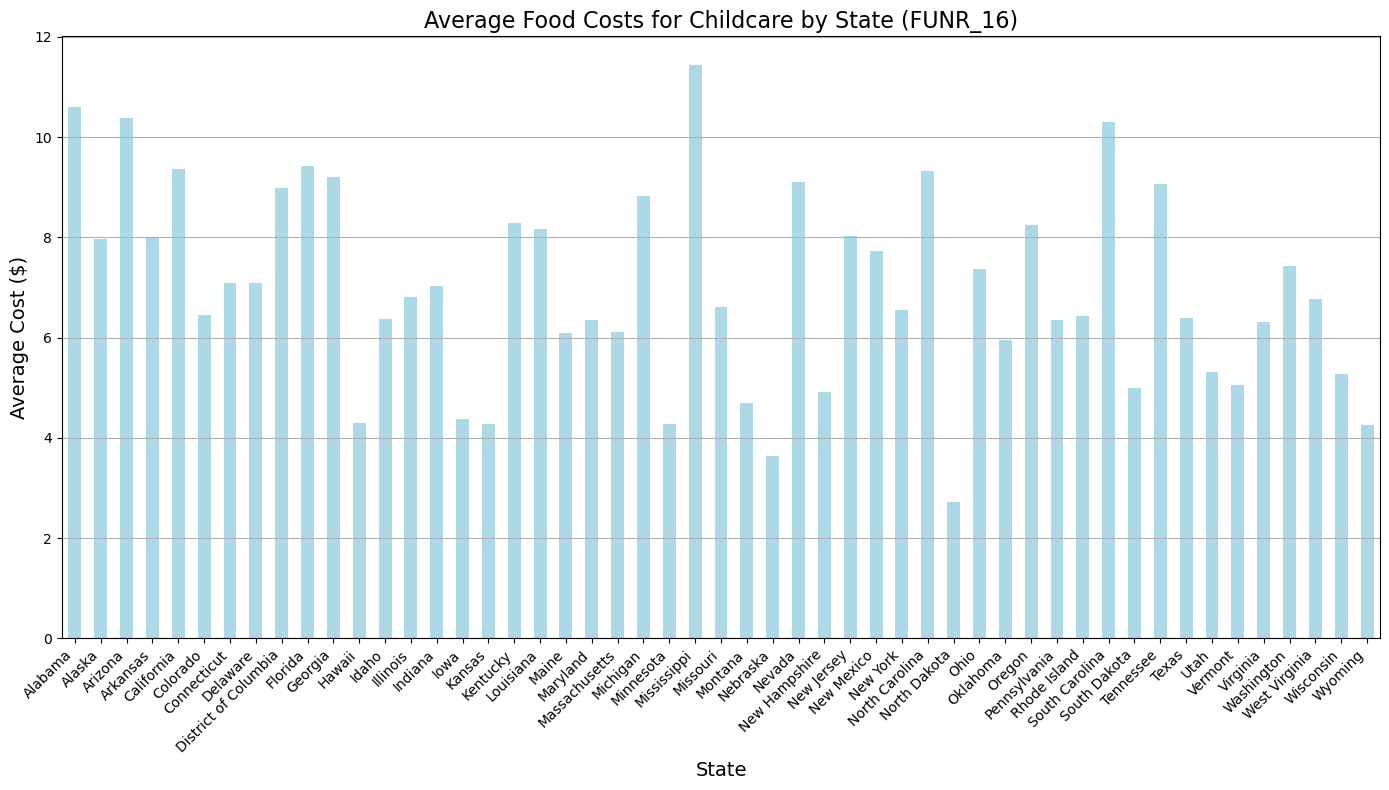

In [23]:
# Plot bar chart for average food costs comparison by state
plt.figure(figsize=(14, 8))
average_prices_by_state['FUNR_16'].plot(kind='bar', color='lightblue')
plt.title('Average Food Costs for Childcare by State (FUNR_16)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Cost ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.savefig('average_food_costs_by_state.png')
plt.show()

## Line Chart of Average Costs Over Time

<Figure size 1200x600 with 0 Axes>

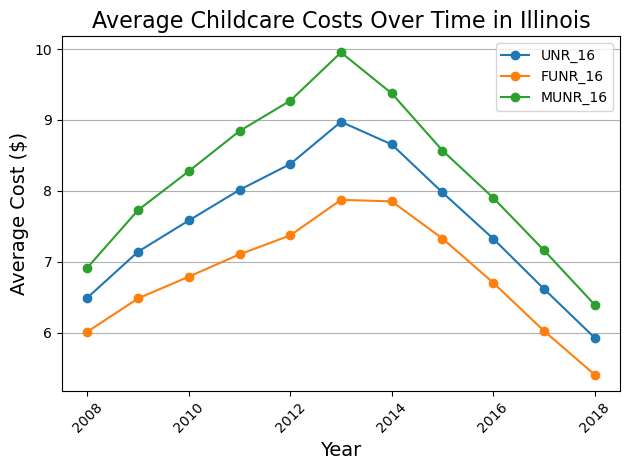

In [24]:
# Show average costs by year for a specific state (Illinois)
illinois_data = data_filled[data_filled['State_Name'] == 'Illinois']
average_costs_by_year = illinois_data.groupby(illinois_data['StudyYear'].dt.year)[['UNR_16', 'FUNR_16', 'MUNR_16']].mean()

plt.figure(figsize=(12, 6))
average_costs_by_year.plot(marker='o')
plt.title('Average Childcare Costs Over Time in Illinois', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Cost ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('average_costs_over_time_illinois.png')
plt.show()

## Pie Chart of Single Parent Households

In [29]:
# Calculate number of single-parent and two-parent households
single_parent_count = data_filled['H_Under6_SingleM'].sum()  # Total single-parent households
total_households_count = data_filled['Households'].sum()  # Total households
two_parent_count = total_households_count - single_parent_count  # Calculate two-parent households

# ensure the calculations are correct
print(f"Single Parent Households: {single_parent_count}")
print(f"Two Parent Households: {two_parent_count}")

Single Parent Households: 68866104.49992767
Two Parent Households: 1205376717.5000722


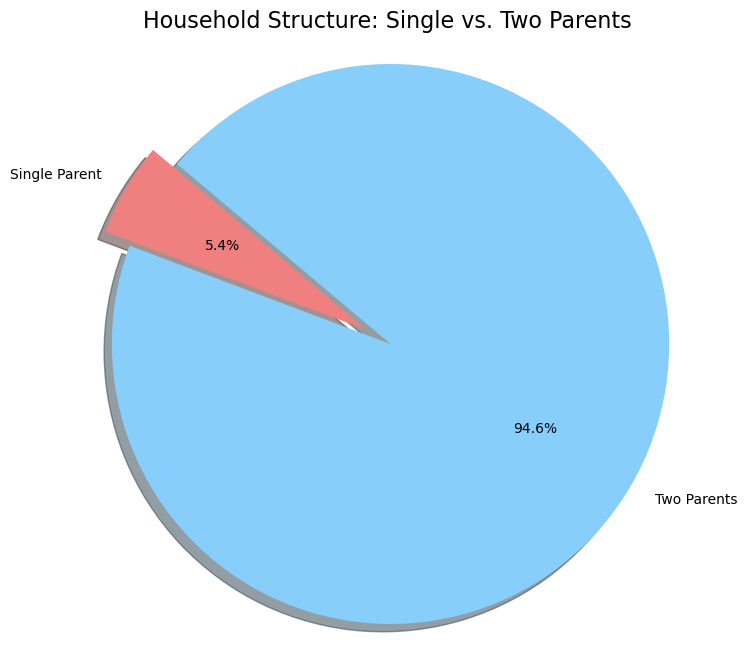

In [30]:
# Create the Pie Chart with Actual Values
labels = ['Single Parent', 'Two Parents']
sizes = [single_parent_count, two_parent_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Household Structure: Single vs. Two Parents', fontsize=16)
plt.axis('equal')
plt.savefig('single_parent_households.png')
plt.show()

## Stacked Bar Chart

In [31]:
# Prepare data using the calculated averages
stacked_data = average_prices_by_state[['UNR_16', 'FUNR_16', 'MUNR_16']]

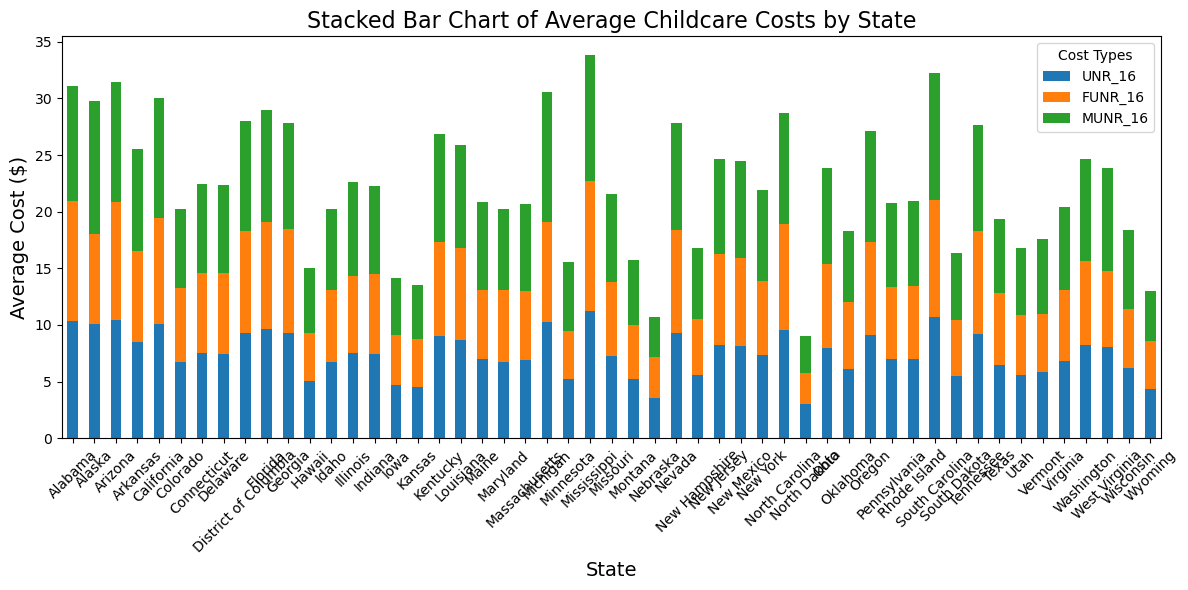

In [32]:
# Create the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Stacked Bar Chart of Average Childcare Costs by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Cost ($)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Cost Types', labels=['UNR_16', 'FUNR_16', 'MUNR_16'])
plt.tight_layout()
plt.savefig('stacked_bar_chart_childcare_costs.png')
plt.show()

# Infographic

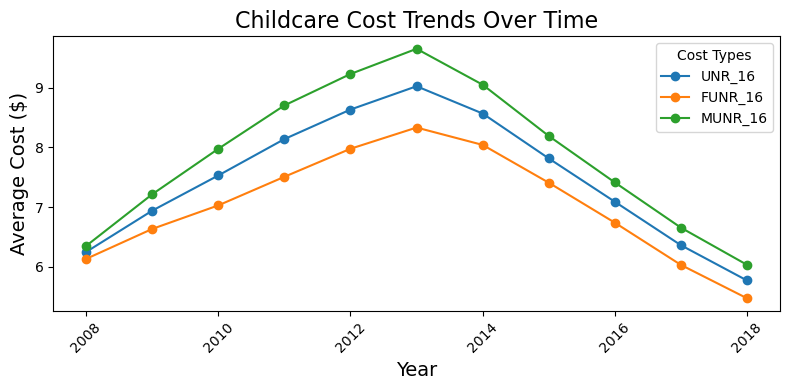

In [37]:
# Prepare trend data
trend_data = data.groupby('StudyYear')[['UNR_16', 'FUNR_16', 'MUNR_16']].mean()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(trend_data.index, trend_data['UNR_16'], label='UNR_16', marker='o')
plt.plot(trend_data.index, trend_data['FUNR_16'], label='FUNR_16', marker='o')
plt.plot(trend_data.index, trend_data['MUNR_16'], label='MUNR_16', marker='o')
plt.title('Childcare Cost Trends Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Cost ($)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Cost Types')
plt.tight_layout()
plt.savefig('trend_graph.png')
plt.show()

In [34]:
single_parent_count = data['H_Under6_SingleM'].sum()
two_parent_count = data['H_Under6_BothWork'].sum()

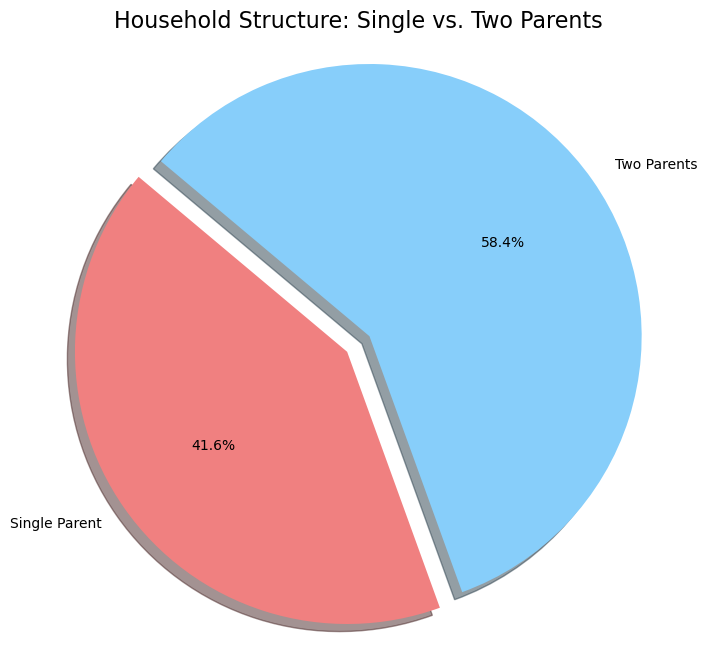

In [36]:
# Calculate the counts of single-parent and two-parent households
single_parent_count = data['H_Under6_SingleM'].sum()
two_parent_count = data['H_Under6_BothWork'].sum()

# Sample data for childcare costs
labels = ['Single Parent', 'Two Parents']
sizes = [single_parent_count, two_parent_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Household Structure: Single vs. Two Parents', fontsize=16)
plt.axis('equal')
plt.savefig('single_parent_households.png')
plt.show()